# openCV 프레임단위로 사진 저장하기

In [ ]:
num = input("How many frame want to get? :")

num = int(num)

div_num = lenth //num

count = 0

while(video.isOpened()):
	ret, image = video.read()
	if(int(video.get(1)) % div_num == 0):
		cv2.imwrite(filepath[:4] + "/frame%d.jpg" % count, image)
		print('Saved frame number :', str(int(video.get(1))))
		
		count += 1
	if video.get(1) == length-1 :
		break
		
video.release()

In [3]:
import cv2

# 동영상 파일 경로
video_path = '/home/jook/dev_ws/dl_project/data/IMG_3295.webm'
# 저장할 이미지 파일 경로
filepath = '/home/jook/dev_ws/dl_project/data/frames/'

# 동영상 불러오기
video = cv2.VideoCapture(video_path)

# 동영상 길이(프레임 개수) 가져오기
length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# 프레임 추출 개수 입력받기
num = input("How many frames do you want to extract? : ")
# num = int(num)
num = 90


# 프레임 간격 계산
div_num = length // num

count = 0

# 동영상이 열려 있는 동안 프레임 추출
while video.isOpened():
    ret, image = video.read()
    if not ret:  # 영상의 끝에 도달하면 종료
        break
    # 현재 프레임이 div_num의 배수일 때 프레임 저장
    if int(video.get(cv2.CAP_PROP_POS_FRAMES)) % div_num == 0:
        cv2.imwrite(filepath + f"frame{count}.jpg", image)
        print(f'Saved frame number: {int(video.get(cv2.CAP_PROP_POS_FRAMES))}')
        count += 1
    
    # # 마지막 프레임에 도달하면 루프 종료
    # if video.get(cv2.CAP_PROP_POS_FRAMES) == length - 1:
    #     break

    if count == num:
        break

# 비디오 파일 닫기
video.release()


Saved frame number: 10
Saved frame number: 20
Saved frame number: 30
Saved frame number: 40
Saved frame number: 50
Saved frame number: 60
Saved frame number: 70
Saved frame number: 80
Saved frame number: 90
Saved frame number: 100
Saved frame number: 110
Saved frame number: 120
Saved frame number: 130
Saved frame number: 140
Saved frame number: 150
Saved frame number: 160
Saved frame number: 170
Saved frame number: 180
Saved frame number: 190
Saved frame number: 200
Saved frame number: 210
Saved frame number: 220
Saved frame number: 230
Saved frame number: 240
Saved frame number: 250
Saved frame number: 260
Saved frame number: 270
Saved frame number: 280
Saved frame number: 290
Saved frame number: 300
Saved frame number: 310
Saved frame number: 320
Saved frame number: 330
Saved frame number: 340
Saved frame number: 350
Saved frame number: 360
Saved frame number: 370
Saved frame number: 380
Saved frame number: 390
Saved frame number: 400
Saved frame number: 410
Saved frame number: 420
S

# SAM2 활용

In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "0"

In [2]:
import torch

torch.cuda.empty_cache()

In [2]:
import torch
from segment_anything import sam_model_registry, SamPredictor
import cv2
import matplotlib.pyplot as plt

# SAM2 모델 로딩 (사전 학습된 모델 사용)
sam_checkpoint = "/home/jook/dev_ws/SAM2/check/sam_vit_h_4b8939.pth"  # 사전 학습된 체크포인트 파일 경로
device = "cuda" if torch.cuda.is_available() else "cpu"

# SAM2 모델 가져오기
sam = sam_model_registry["vit_h"](checkpoint=sam_checkpoint)
sam.to(device)

# SAM2를 위한 예측기 초기화
predictor = SamPredictor(sam)


/home/jook/venv/ml_venv/lib/python3.10/site-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [15]:
# 이미지 불러오기
image_path = "/home/jook/dev_ws/dl_project/data/water_spill/test/images/OIP-eIrSb36naScC5vwEILWdBgHaFb_png_jpg.rf.2f9427c281c9b6037ff95bdf10895e95.jpg"  # 이미지 파일 경로
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 불러오므로 RGB로 변환

# 이미지 로드
predictor.set_image(image_rgb)


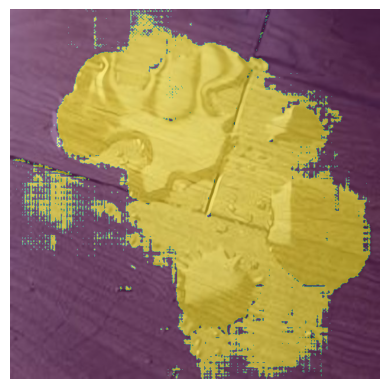

In [25]:
import numpy as np

# 예: 이미지에서 특정 지점을 클릭했다고 가정 (x, y 좌표로 지정)
input_point = np.array([[250, 300], [400, 400], [450, 400]])  # 클릭한 좌표
input_label = np.array([1, 1, 1])  # 1은 foreground(대상), 0은 background(배경)

# 클릭된 좌표를 기반으로 세그멘테이션
masks, _, _ = predictor.predict(point_coords=input_point, point_labels=input_label, multimask_output=False)

# 세그멘테이션 결과를 시각화
plt.imshow(image_rgb)
plt.imshow(masks[0], alpha=0.5)  # 마스크를 반투명하게 보여줌
plt.axis('off')
plt.show()


# Classify 로 해보자

In [4]:
from ultralytics import YOLO
model = YOLO('yolov8n-cls.pt')
results = model.predict(source="/home/jook/dev_ws/dl_project/data/water_spill/test/images/OIP-csPst-eQMljvMuupkXtBgwHaEK_png_jpg.rf.76274e96c9f0c0ad469ff24f89798aa5.jpg", save=True)


image 1/1 /home/jook/dev_ws/dl_project/data/water_spill/test/images/OIP-csPst-eQMljvMuupkXtBgwHaEK_png_jpg.rf.76274e96c9f0c0ad469ff24f89798aa5.jpg: 224x224 toilet_tissue 0.18, bannister 0.15, table_lamp 0.15, paper_towel 0.08, lampshade 0.05, 55.1ms
Speed: 31.2ms preprocess, 55.1ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict6


In [9]:
model = YOLO('yolov8n-cls.pt')

results = model.train(data="/home/jook/dev_ws/dl_project/data/water_spill", save=True)

New https://pypi.org/project/ultralytics/8.2.90 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (AMD Ryzen 7 7735HS with Radeon Graphics)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/home/jook/dev_ws/dl_project/data/water_spill, epochs=100, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina

/home/jook/venv/ml_venv/lib/python3.10/site-packages/ultralytics/engine/trainer.py:271: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /home/jook/dev_ws/dl_project/data/water_spill/train... 4937 images, 0 corrupt: 100%|██████████| 4937/4937 [00:00<00:00, 6080.81it/s]

train: New cache created: /home/jook/dev_ws/dl_project/data/water_spill/train.cache



val: Scanning /home/jook/dev_ws/dl_project/data/water_spill/test... 615 images, 0 corrupt: 100%|██████████| 615/615 [00:00<00:00, 6192.75it/s]


val: New cache created: /home/jook/dev_ws/dl_project/data/water_spill/test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to runs/classify/train7
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100         0G    0.09078          9        224: 100%|██████████| 309/309 [01:00<00:00,  5.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.76it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100         0G   0.001184          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  6.03it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100         0G  0.0003177          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.59it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100         0G  0.0001244          9        224: 100%|██████████| 309/309 [00:57<00:00,  5.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.68it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100         0G  6.581e-05          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.71it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100         0G  4.824e-05          9        224: 100%|██████████| 309/309 [01:06<00:00,  4.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.07it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100         0G  3.449e-05          9        224: 100%|██████████| 309/309 [01:06<00:00,  4.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.13it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100         0G  2.879e-05          9        224: 100%|██████████| 309/309 [01:05<00:00,  4.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:04<00:00,  4.84it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100         0G  2.262e-05          9        224: 100%|██████████| 309/309 [01:05<00:00,  4.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.02it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100         0G  1.893e-05          9        224: 100%|██████████| 309/309 [01:04<00:00,  4.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.85it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100         0G   1.75e-05          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.39it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100         0G  1.519e-05          9        224: 100%|██████████| 309/309 [00:57<00:00,  5.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.85it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100         0G  1.189e-05          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.97it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100         0G  1.103e-05          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.50it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100         0G   9.84e-06          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  6.01it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100         0G  8.313e-06          9        224: 100%|██████████| 309/309 [00:57<00:00,  5.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.58it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100         0G  7.911e-06          9        224: 100%|██████████| 309/309 [00:59<00:00,  5.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.53it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100         0G   7.61e-06          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.74it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100         0G  6.675e-06          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.95it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100         0G  6.032e-06          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.86it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100         0G  5.345e-06          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.57it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100         0G  5.227e-06          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.43it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100         0G  4.888e-06          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.69it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100         0G  4.537e-06          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.47it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100         0G  4.324e-06          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.92it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100         0G  3.829e-06          9        224: 100%|██████████| 309/309 [01:00<00:00,  5.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.44it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100         0G  3.659e-06          9        224: 100%|██████████| 309/309 [01:02<00:00,  4.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.21it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100         0G  3.406e-06          9        224: 100%|██████████| 309/309 [01:06<00:00,  4.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:04<00:00,  4.86it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100         0G  3.457e-06          9        224: 100%|██████████| 309/309 [01:05<00:00,  4.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.08it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100         0G  3.107e-06          9        224: 100%|██████████| 309/309 [01:06<00:00,  4.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.46it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100         0G  3.065e-06          9        224: 100%|██████████| 309/309 [01:00<00:00,  5.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.62it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100         0G  2.713e-06          9        224: 100%|██████████| 309/309 [00:59<00:00,  5.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.49it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100         0G  2.617e-06          9        224: 100%|██████████| 309/309 [01:00<00:00,  5.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.29it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100         0G  2.602e-06          9        224: 100%|██████████| 309/309 [01:01<00:00,  5.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:04<00:00,  4.90it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100         0G  2.483e-06          9        224: 100%|██████████| 309/309 [01:00<00:00,  5.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.03it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100         0G  2.158e-06          9        224: 100%|██████████| 309/309 [01:00<00:00,  5.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.24it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100         0G  2.068e-06          9        224: 100%|██████████| 309/309 [00:59<00:00,  5.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.64it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100         0G  1.905e-06          9        224: 100%|██████████| 309/309 [00:57<00:00,  5.34it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.75it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100         0G  2.098e-06          9        224: 100%|██████████| 309/309 [01:00<00:00,  5.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.47it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100         0G  2.094e-06          9        224: 100%|██████████| 309/309 [00:57<00:00,  5.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.55it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100         0G  1.824e-06          9        224: 100%|██████████| 309/309 [00:58<00:00,  5.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.69it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100         0G  1.758e-06          9        224: 100%|██████████| 309/309 [01:00<00:00,  5.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.32it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100         0G  1.594e-06          9        224: 100%|██████████| 309/309 [00:58<00:00,  5.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.73it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100         0G  1.487e-06          9        224: 100%|██████████| 309/309 [00:59<00:00,  5.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.31it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100         0G   1.47e-06          9        224: 100%|██████████| 309/309 [00:58<00:00,  5.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.44it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100         0G  1.544e-06          9        224: 100%|██████████| 309/309 [00:59<00:00,  5.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.85it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100         0G  1.375e-06          9        224: 100%|██████████| 309/309 [00:57<00:00,  5.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  6.05it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100         0G   1.32e-06          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.63it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100         0G   1.34e-06          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.62it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100         0G   1.18e-06          9        224: 100%|██████████| 309/309 [00:54<00:00,  5.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.88it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100         0G  1.132e-06          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.65it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100         0G  1.136e-06          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  6.04it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100         0G  1.106e-06          9        224: 100%|██████████| 309/309 [00:57<00:00,  5.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.32it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100         0G  1.103e-06          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.72it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100         0G  1.032e-06          9        224: 100%|██████████| 309/309 [00:57<00:00,  5.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.25it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100         0G  1.027e-06          9        224: 100%|██████████| 309/309 [00:59<00:00,  5.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.66it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100         0G  9.265e-07          9        224: 100%|██████████| 309/309 [00:59<00:00,  5.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.66it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100         0G  9.494e-07          9        224: 100%|██████████| 309/309 [00:57<00:00,  5.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.48it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100         0G  1.068e-06          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.61it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100         0G  8.735e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.56it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100         0G   7.74e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.53it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100         0G  8.379e-07          9        224: 100%|██████████| 309/309 [00:54<00:00,  5.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.85it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100         0G  7.672e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.63it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100         0G  7.488e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  6.00it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100         0G  6.937e-07          9        224: 100%|██████████| 309/309 [00:57<00:00,  5.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.40it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100         0G  7.596e-07          9        224: 100%|██████████| 309/309 [01:00<00:00,  5.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.49it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100         0G  6.982e-07          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.59it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100         0G  6.787e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.86it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100         0G  6.501e-07          9        224: 100%|██████████| 309/309 [00:58<00:00,  5.30it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.61it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100         0G  6.599e-07          9        224: 100%|██████████| 309/309 [00:59<00:00,  5.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.50it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100         0G  6.347e-07          9        224: 100%|██████████| 309/309 [01:01<00:00,  4.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.92it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100         0G  6.008e-07          9        224: 100%|██████████| 309/309 [00:59<00:00,  5.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.12it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100         0G  5.973e-07          9        224: 100%|██████████| 309/309 [01:05<00:00,  4.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:04<00:00,  4.67it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100         0G  6.218e-07          9        224: 100%|██████████| 309/309 [01:01<00:00,  5.01it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.42it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100         0G  6.063e-07          9        224: 100%|██████████| 309/309 [01:00<00:00,  5.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  6.02it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100         0G  5.685e-07          9        224: 100%|██████████| 309/309 [01:02<00:00,  4.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.39it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100         0G  5.309e-07          9        224: 100%|██████████| 309/309 [01:00<00:00,  5.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:04<00:00,  4.78it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100         0G  5.519e-07          9        224: 100%|██████████| 309/309 [01:00<00:00,  5.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.29it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100         0G  5.149e-07          9        224: 100%|██████████| 309/309 [01:01<00:00,  4.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.34it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100         0G  5.089e-07          9        224: 100%|██████████| 309/309 [00:57<00:00,  5.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.92it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100         0G  5.027e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.51it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100         0G  4.985e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.77it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100         0G  5.131e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.90it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100         0G  4.745e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.79it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100         0G  4.624e-07          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  6.14it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100         0G  4.506e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.79it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100         0G  4.426e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.52it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100         0G  4.627e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.72it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100         0G  4.396e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.76it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100         0G  4.634e-07          9        224: 100%|██████████| 309/309 [00:54<00:00,  5.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.58it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100         0G  4.018e-07          9        224: 100%|██████████| 309/309 [00:54<00:00,  5.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.80it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100         0G  4.319e-07          9        224: 100%|██████████| 309/309 [00:56<00:00,  5.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.77it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100         0G  4.086e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.76it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100         0G  4.234e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.85it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100         0G  4.503e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.68it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100         0G  3.952e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.78it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100         0G  4.146e-07          9        224: 100%|██████████| 309/309 [00:54<00:00,  5.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.56it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100         0G  4.238e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.86it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100         0G  3.854e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.86it/s]

                   all          1          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100         0G  3.845e-07          9        224: 100%|██████████| 309/309 [00:55<00:00,  5.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  6.08it/s]

                   all          1          1



100 epochs completed in 1.726 hours.
Optimizer stripped from runs/classify/train7/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train7/weights/best.pt, 3.0MB

Validating runs/classify/train7/weights/best.pt...
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.4.0+cu121 CPU (AMD Ryzen 7 7735HS with Radeon Graphics)
YOLOv8n-cls summary (fused): 73 layers, 1,437,442 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /home/jook/dev_ws/dl_project/data/water_spill/train... found 4937 images in 1 classes: ERROR ❌️ requires 2 classes, not 1
val: None...
test: /home/jook/dev_ws/dl_project/data/water_spill/test... found 615 images in 1 classes: ERROR ❌️ requires 2 classes, not 1


               classes   top1_acc   top5_acc: 100%|██████████| 20/20 [00:03<00:00,  5.98it/s]


                   all          1          1
Speed: 0.0ms preprocess, 1.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train7
Results saved to runs/classify/train7


In [11]:
model = YOLO("./runs/classify/train7/weights/best.pt")

results = model.predict(source = "./img/wtfloor.jpg", save = True)


image 1/1 /home/jook/dev_ws/YOLO/img/wtfloor.jpg: 224x224 images 1.00, labels 0.00, 6.7ms
Speed: 4.5ms preprocess, 6.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to runs/classify/predict7


# mask R-CNN

In [13]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog


In [14]:

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("/home/jook/dev_ws/dl_project/data/water_spill/data.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("/home/jook/dev_ws/dl_project/data/water_spill/data.yaml")
predictor = DefaultPredictor(cfg)
panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2.imshow(out.get_image()[:, :, ::-1])

RuntimeError: /home/jook/dev_ws/dl_project/data/water_spill/data.yaml not available in Model Zoo!

# YOLOv8로 회귀

In [1]:
import torch

torch.cuda.empty_cache()

In [2]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

results = model.train(data = "/home/jook/dev_ws/dl_project/data/water_spill/data.yaml", epochs = 100)

New https://pypi.org/project/ultralytics/8.2.90 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7940MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/jook/dev_ws/dl_project/data/water_spill/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=

/home/jook/venv/ml_venv/lib/python3.10/site-packages/ultralytics/engine/trainer.py:271: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /home/jook/dev_ws/dl_project/data/water_spill/train/labels.cache... 4937 images, 2 backgrounds, 0 corrupt: 100%|██████████| 4937/4937 [00:00<?, ?it/s]
val: Scanning /home/jook/dev_ws/dl_project/data/water_spill/valid/labels.cache... 1232 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1232/1232 [00:00<?, ?it/s]


Plotting labels to runs/detect/train22/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train22
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.12G      1.664      2.261      1.937         25        640: 100%|██████████| 309/309 [00:33<00:00,  9.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.01it/s]


                   all       1232       1372      0.374      0.436      0.349      0.122

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100       2.1G      1.747      2.032      1.996         23        640: 100%|██████████| 309/309 [00:31<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.10it/s]


                   all       1232       1372      0.419      0.375      0.341      0.126

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.12G      1.753      1.968      2.001         24        640: 100%|██████████| 309/309 [00:31<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.15it/s]


                   all       1232       1372        0.5      0.485      0.452      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.09G      1.731      1.883      1.974         26        640: 100%|██████████| 309/309 [00:31<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.16it/s]


                   all       1232       1372      0.522      0.507        0.5      0.182

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.07G      1.681      1.853      1.939         25        640: 100%|██████████| 309/309 [00:31<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.78it/s]


                   all       1232       1372      0.558      0.531      0.522      0.196

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.09G      1.663      1.797      1.922         23        640: 100%|██████████| 309/309 [00:31<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.09it/s]

                   all       1232       1372      0.553       0.45      0.481      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.08G      1.648      1.744      1.907         20        640: 100%|██████████| 309/309 [00:31<00:00,  9.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.08it/s]


                   all       1232       1372      0.634      0.551      0.573      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.07G      1.616      1.707      1.887         20        640: 100%|██████████| 309/309 [00:32<00:00,  9.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.77it/s]

                   all       1232       1372      0.665      0.565      0.625      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.06G      1.603      1.685      1.878         25        640: 100%|██████████| 309/309 [00:31<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.15it/s]

                   all       1232       1372        0.6       0.57      0.585      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.08G      1.597      1.676       1.87         22        640: 100%|██████████| 309/309 [00:31<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.25it/s]

                   all       1232       1372      0.719      0.614      0.682      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.11G      1.584      1.617      1.855         20        640: 100%|██████████| 309/309 [00:31<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.28it/s]

                   all       1232       1372      0.701      0.602      0.657      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.07G      1.592      1.634      1.855         26        640: 100%|██████████| 309/309 [00:31<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.64it/s]


                   all       1232       1372      0.694      0.599      0.674      0.288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.07G      1.561      1.587      1.837         16        640: 100%|██████████| 309/309 [00:31<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.94it/s]

                   all       1232       1372      0.712      0.655        0.7       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.09G       1.57      1.585      1.841         20        640: 100%|██████████| 309/309 [00:32<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.57it/s]


                   all       1232       1372      0.704      0.602      0.685      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.07G      1.573      1.564      1.837         26        640: 100%|██████████| 309/309 [00:31<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.65it/s]


                   all       1232       1372      0.707      0.643      0.703      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.09G      1.541      1.569      1.821         14        640: 100%|██████████| 309/309 [00:31<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.08it/s]


                   all       1232       1372      0.723      0.627        0.7      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.08G      1.554      1.553      1.829         33        640: 100%|██████████| 309/309 [00:31<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.66it/s]


                   all       1232       1372      0.759      0.681      0.744      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.09G       1.53      1.525      1.812         29        640: 100%|██████████| 309/309 [00:31<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.89it/s]

                   all       1232       1372       0.69       0.65      0.687      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.07G       1.54      1.522      1.824         19        640: 100%|██████████| 309/309 [00:31<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.57it/s]


                   all       1232       1372      0.778      0.685      0.757       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.07G      1.528      1.499      1.814         21        640: 100%|██████████| 309/309 [00:31<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.02it/s]

                   all       1232       1372      0.726      0.687      0.713      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.06G      1.531      1.493      1.811         17        640: 100%|██████████| 309/309 [00:31<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.81it/s]

                   all       1232       1372       0.77      0.696       0.76      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.09G      1.521        1.5      1.815         17        640: 100%|██████████| 309/309 [00:31<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.85it/s]

                   all       1232       1372      0.779      0.677      0.765      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.07G      1.525      1.479      1.796         20        640: 100%|██████████| 309/309 [00:31<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.18it/s]

                   all       1232       1372       0.75      0.681      0.741      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.09G      1.512      1.453      1.796         23        640: 100%|██████████| 309/309 [00:31<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.07it/s]

                   all       1232       1372      0.786      0.697      0.771      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.08G      1.506      1.461      1.796         20        640: 100%|██████████| 309/309 [00:31<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.10it/s]

                   all       1232       1372      0.763      0.674      0.757      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.09G      1.506      1.436      1.787         22        640: 100%|██████████| 309/309 [00:31<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.59it/s]

                   all       1232       1372      0.767      0.694      0.761      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.07G      1.484      1.432      1.773         17        640: 100%|██████████| 309/309 [00:31<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.04it/s]

                   all       1232       1372      0.771      0.675      0.756      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.07G      1.499      1.432      1.778         18        640: 100%|██████████| 309/309 [00:31<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.99it/s]

                   all       1232       1372      0.789      0.679      0.762      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.06G      1.515      1.444      1.795         23        640: 100%|██████████| 309/309 [00:31<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.04it/s]

                   all       1232       1372      0.781      0.687      0.761      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.09G      1.485      1.423      1.775         17        640: 100%|██████████| 309/309 [00:31<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.53it/s]


                   all       1232       1372        0.8       0.71      0.787      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.07G      1.482      1.412      1.766         19        640: 100%|██████████| 309/309 [00:31<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.99it/s]

                   all       1232       1372      0.781       0.68      0.768      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.07G      1.483      1.409      1.773         20        640: 100%|██████████| 309/309 [00:31<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.18it/s]

                   all       1232       1372      0.787      0.724      0.795      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.06G      1.477      1.399      1.773         26        640: 100%|██████████| 309/309 [00:31<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.87it/s]


                   all       1232       1372      0.779      0.692      0.778      0.365

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.09G      1.472      1.382      1.763         11        640: 100%|██████████| 309/309 [00:31<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.19it/s]

                   all       1232       1372      0.768      0.674      0.748      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.07G       1.48       1.36      1.764         19        640: 100%|██████████| 309/309 [00:31<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.90it/s]

                   all       1232       1372      0.798       0.74      0.787      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.07G      1.474      1.362      1.766         24        640: 100%|██████████| 309/309 [00:31<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.31it/s]

                   all       1232       1372      0.808        0.7      0.789      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.06G      1.472       1.37       1.76         19        640: 100%|██████████| 309/309 [00:31<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.25it/s]

                   all       1232       1372       0.79       0.72      0.795       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.09G      1.467      1.354      1.756         22        640: 100%|██████████| 309/309 [00:31<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.35it/s]

                   all       1232       1372      0.787      0.731      0.802      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.07G       1.47      1.365      1.761         25        640: 100%|██████████| 309/309 [00:31<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.27it/s]

                   all       1232       1372      0.809      0.714      0.794      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.07G      1.453       1.35      1.744         24        640: 100%|██████████| 309/309 [00:31<00:00,  9.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.62it/s]

                   all       1232       1372      0.806      0.721      0.807      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.06G      1.459      1.332      1.754         18        640: 100%|██████████| 309/309 [00:31<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.71it/s]

                   all       1232       1372      0.817      0.733      0.804      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.09G      1.465      1.343      1.751         22        640: 100%|██████████| 309/309 [00:31<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.34it/s]

                   all       1232       1372      0.797      0.728      0.796      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.07G      1.445      1.338      1.738         28        640: 100%|██████████| 309/309 [00:31<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.21it/s]

                   all       1232       1372      0.823      0.736      0.809      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.07G      1.447      1.304      1.735         22        640: 100%|██████████| 309/309 [00:31<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.36it/s]

                   all       1232       1372      0.822      0.743      0.814      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.06G      1.442        1.3      1.734         20        640: 100%|██████████| 309/309 [00:31<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.27it/s]

                   all       1232       1372      0.833      0.733      0.812      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.09G      1.442      1.293      1.732         17        640: 100%|██████████| 309/309 [00:31<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.34it/s]

                   all       1232       1372      0.835      0.747      0.814       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.07G      1.443      1.309      1.731         20        640: 100%|██████████| 309/309 [00:31<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.32it/s]

                   all       1232       1372      0.814      0.742      0.814      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.07G      1.447      1.303      1.734         26        640: 100%|██████████| 309/309 [00:31<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.25it/s]

                   all       1232       1372       0.81      0.749      0.813      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.06G       1.44      1.299      1.734         18        640: 100%|██████████| 309/309 [00:31<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.34it/s]

                   all       1232       1372      0.832      0.727      0.815      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.09G      1.427      1.293      1.723         22        640: 100%|██████████| 309/309 [00:31<00:00,  9.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.27it/s]

                   all       1232       1372      0.837      0.747      0.819      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.07G      1.421      1.287      1.721         17        640: 100%|██████████| 309/309 [00:31<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.40it/s]


                   all       1232       1372      0.826      0.736      0.813      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.07G      1.426      1.283      1.725         19        640: 100%|██████████| 309/309 [00:31<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.20it/s]

                   all       1232       1372      0.822      0.755      0.821      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.06G      1.438      1.257      1.718         18        640: 100%|██████████| 309/309 [00:31<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.05it/s]

                   all       1232       1372      0.823      0.747      0.823      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.08G      1.411      1.263      1.715         29        640: 100%|██████████| 309/309 [00:31<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.34it/s]


                   all       1232       1372      0.849      0.749      0.825      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.07G      1.435      1.265      1.728         23        640: 100%|██████████| 309/309 [00:31<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.09it/s]

                   all       1232       1372      0.842      0.738      0.826        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.07G      1.422      1.256      1.719         30        640: 100%|██████████| 309/309 [00:31<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.11it/s]

                   all       1232       1372      0.834      0.748      0.828      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.08G      1.416      1.247      1.709         26        640: 100%|██████████| 309/309 [00:31<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.13it/s]

                   all       1232       1372      0.842      0.759      0.836      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.08G      1.418       1.23      1.714         29        640: 100%|██████████| 309/309 [00:31<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.82it/s]

                   all       1232       1372      0.839      0.762      0.836      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.07G       1.41       1.22      1.705         15        640: 100%|██████████| 309/309 [00:31<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.25it/s]

                   all       1232       1372      0.838      0.755      0.833      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.07G      1.417      1.225      1.717         21        640: 100%|██████████| 309/309 [00:31<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.20it/s]

                   all       1232       1372      0.835       0.77      0.829      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.06G      1.407      1.229      1.706         18        640: 100%|██████████| 309/309 [00:31<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.01it/s]

                   all       1232       1372      0.863      0.763      0.841      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.08G      1.408      1.216      1.712         22        640: 100%|██████████| 309/309 [00:31<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.10it/s]

                   all       1232       1372      0.856      0.767      0.834      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.07G      1.405      1.229      1.707         16        640: 100%|██████████| 309/309 [00:31<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.17it/s]

                   all       1232       1372      0.858      0.765      0.837      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.07G      1.398      1.207      1.702         21        640: 100%|██████████| 309/309 [00:31<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.00it/s]

                   all       1232       1372      0.845      0.776      0.834      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.06G        1.4      1.199      1.697         17        640: 100%|██████████| 309/309 [00:31<00:00,  9.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.24it/s]

                   all       1232       1372      0.869       0.78      0.841      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.09G      1.378      1.213      1.687         20        640: 100%|██████████| 309/309 [00:31<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.27it/s]

                   all       1232       1372      0.857      0.775      0.832      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.07G      1.379      1.202      1.683         23        640: 100%|██████████| 309/309 [00:31<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.34it/s]

                   all       1232       1372      0.839      0.773      0.833      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.07G      1.386      1.197      1.692         24        640: 100%|██████████| 309/309 [00:31<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.30it/s]

                   all       1232       1372      0.847       0.78      0.845      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.06G      1.391      1.207      1.694         20        640: 100%|██████████| 309/309 [00:31<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.35it/s]

                   all       1232       1372      0.867      0.771      0.846      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.08G      1.383       1.19      1.688         19        640: 100%|██████████| 309/309 [00:31<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.29it/s]

                   all       1232       1372      0.843      0.777       0.84       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.08G      1.371      1.169      1.676         18        640: 100%|██████████| 309/309 [00:31<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.30it/s]

                   all       1232       1372       0.85      0.771      0.843      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.07G       1.37      1.163      1.673         23        640: 100%|██████████| 309/309 [00:31<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.36it/s]

                   all       1232       1372      0.855       0.77      0.843      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.06G      1.371      1.165      1.675         23        640: 100%|██████████| 309/309 [00:31<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.35it/s]

                   all       1232       1372      0.845      0.781      0.852      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.08G      1.371      1.163      1.677         16        640: 100%|██████████| 309/309 [00:31<00:00,  9.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.31it/s]

                   all       1232       1372      0.842      0.776      0.841      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.07G      1.357      1.161      1.669         23        640: 100%|██████████| 309/309 [00:31<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.93it/s]

                   all       1232       1372      0.855      0.794      0.853      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.07G      1.366      1.149      1.674         15        640: 100%|██████████| 309/309 [00:31<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.13it/s]

                   all       1232       1372      0.854      0.786       0.85      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.06G      1.359      1.163      1.672         19        640: 100%|██████████| 309/309 [00:31<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.21it/s]

                   all       1232       1372      0.864      0.773      0.848      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.09G      1.364      1.141      1.671         24        640: 100%|██████████| 309/309 [00:31<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.16it/s]

                   all       1232       1372      0.845      0.783      0.844      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.07G       1.37      1.155      1.672         18        640: 100%|██████████| 309/309 [00:31<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.17it/s]

                   all       1232       1372      0.858      0.758      0.843      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.09G      1.362      1.142      1.668         26        640: 100%|██████████| 309/309 [00:31<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.25it/s]

                   all       1232       1372      0.849      0.789      0.845      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.08G      1.356       1.14      1.665         24        640: 100%|██████████| 309/309 [00:31<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.14it/s]

                   all       1232       1372      0.857      0.784      0.848       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.09G      1.346      1.124      1.658         30        640: 100%|██████████| 309/309 [00:31<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.21it/s]

                   all       1232       1372      0.858      0.784      0.847      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.07G      1.345      1.113      1.663         24        640: 100%|██████████| 309/309 [00:31<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.17it/s]

                   all       1232       1372      0.855      0.797      0.847      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.08G      1.357      1.123      1.668         18        640: 100%|██████████| 309/309 [00:31<00:00,  9.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.20it/s]

                   all       1232       1372      0.857      0.785      0.851       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.06G      1.339      1.104      1.654         25        640: 100%|██████████| 309/309 [00:31<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.23it/s]

                   all       1232       1372      0.869      0.773      0.849      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.08G      1.336      1.111      1.645         21        640: 100%|██████████| 309/309 [00:31<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.11it/s]

                   all       1232       1372      0.869      0.776      0.848      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.07G      1.335      1.115      1.647         17        640: 100%|██████████| 309/309 [00:31<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.24it/s]

                   all       1232       1372      0.865      0.784      0.851      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.07G      1.333      1.097      1.648         23        640: 100%|██████████| 309/309 [00:31<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.17it/s]

                   all       1232       1372       0.87      0.794      0.853      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.06G      1.333      1.105      1.652         16        640: 100%|██████████| 309/309 [00:31<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.05it/s]

                   all       1232       1372      0.859      0.792      0.848      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.09G      1.325      1.094      1.645         18        640: 100%|██████████| 309/309 [00:31<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.37it/s]

                   all       1232       1372      0.864      0.785      0.852      0.418


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.17G      1.391     0.8812      1.849          9        640: 100%|██████████| 309/309 [00:31<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.00it/s]

                   all       1232       1372      0.859      0.786      0.851      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.09G      1.373     0.8383      1.827          9        640: 100%|██████████| 309/309 [00:31<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.25it/s]

                   all       1232       1372      0.854      0.782      0.847      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.06G      1.374     0.8228      1.826          9        640: 100%|██████████| 309/309 [00:31<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.97it/s]

                   all       1232       1372      0.865      0.776      0.844      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.09G      1.357     0.8268      1.812         11        640: 100%|██████████| 309/309 [00:31<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.95it/s]

                   all       1232       1372      0.855      0.781      0.843      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.07G       1.36     0.8236      1.822         10        640: 100%|██████████| 309/309 [00:31<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.76it/s]

                   all       1232       1372      0.867      0.777      0.845      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.07G      1.354     0.8183      1.815         10        640: 100%|██████████| 309/309 [00:31<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.00it/s]

                   all       1232       1372      0.865      0.781      0.849      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.06G      1.345     0.8032      1.814         10        640: 100%|██████████| 309/309 [00:31<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  8.74it/s]

                   all       1232       1372      0.856      0.784      0.846      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.09G      1.341     0.8101      1.814          9        640: 100%|██████████| 309/309 [00:31<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.20it/s]

                   all       1232       1372      0.862      0.788      0.849      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.07G      1.337     0.7969      1.806         12        640: 100%|██████████| 309/309 [00:31<00:00,  9.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.14it/s]

                   all       1232       1372      0.865      0.792      0.847      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.08G      1.336     0.7938      1.801          9        640: 100%|██████████| 309/309 [00:31<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:04<00:00,  9.00it/s]

                   all       1232       1372      0.863      0.791      0.849      0.416



100 epochs completed in 1.009 hours.
Optimizer stripped from runs/detect/train22/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train22/weights/best.pt, 6.3MB

Validating runs/detect/train22/weights/best.pt...
Ultralytics YOLOv8.2.77 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7940MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  7.44it/s]


                   all       1232       1372      0.863      0.773      0.848      0.424
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train22


In [11]:
model = YOLO("./runs/detect/train22/weights/best.pt")

results = model.predict(source = "./img/wtfloor_4.jpg", save = True)


image 1/1 /home/jook/dev_ws/YOLO/img/wtfloor_4.jpg: 448x640 2 waters, 5.0ms
Speed: 1.5ms preprocess, 5.0ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict14


In [2]:
from ultralytics import YOLO 
import cv2
import os

video_path = "/home/jook/dev_ws/dl_project/data/IMG_3295.webm"
model = YOLO("./runs/detect/train22/weights/best.pt")
             
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video file")
    exit()

frame_count = 24

while True:
    ret, frame = cap.read()

    if not ret:
        print("Error : Could not read frame")
        break

    # 특정 프레임 간격으로 처리 (예: 5프레임마다)
    # if frame_count % 33 == 0:
    results = model.predict(frame)
    annotated_frame = results[0].plot()
    resized_frame = cv2.resize(annotated_frame, (640, 480))
    frame = cv2.putText(img=resized_frame, text="trained", org=(30, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=2, color=(0, 0, 255), thickness=2)

    cv2.imshow("wet floor", frame)

    frame_count += 1
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



0: 640x384 (no detections), 4.8ms
Speed: 2.0ms preprocess, 4.8ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 water, 4.7ms
Speed: 1.9ms preprocess, 4.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 6.1ms
Speed: 2.3ms preprocess, 6.1ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 4.3ms
Speed: 1.7ms preprocess, 4.3ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 water, 4.3ms
Speed: 2.0ms preprocess, 4.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 water, 4.7ms
Speed: 1.6ms preprocess, 4.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 water, 5.2ms
Speed: 1.9ms preprocess, 5.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 water, 4.4ms
Speed: 1.8ms preprocess, 4.4ms inference, 0.9ms postprocess per image at shape (1, 3, 64